# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

The new format for the SAT was released in March 2016. By having the data of participation rates and scores for SAT & ACT test in both 2017/2018, analysis with outside research to identify likely factors that influences participation rate and scores in various states helps us to provide recommendations to College Board on where money is best spent to improve SAT participation rates.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
act2017 = pd.read_csv('data/act_2017.csv')
sat2017 = pd.read_csv('data/sat_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
act2017.tail(2)

,State,Participation,English,Math,Reading,Science,Composite
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [5]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
sat2017.tail(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [7]:
act2017.shape

(52, 7)

In [8]:
act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [9]:
sat2017.shape

(51, 5)

In [10]:
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


ACT 2017:
- Data of participation rate, average test score for each subject and average composite test score for international and local (51 states) participant.
- Test subjects included are English, Math, Reading and Science.
- Test scores are in the tens.

SAT 2017:
- Data of participation rate, average test score and total test score for local participants from 51 states.
- Test subjects included are Evidence-Based Reading and Writing and Math.
- Total score is the sum of both subjects.
- Test scores are in the hundreds.


#### 4a. Does the data look complete? 

Answer:

- By looking through the data, no empty cell observed. However, as compared to SAT2017 data, ACT2017 consists of one more data row which is the test result for national participants.


In [11]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [12]:
act2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [13]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [14]:
sat2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [15]:
act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [16]:
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Answer:

ACT 2017
- As compared to the source, there is an error data observed in the composite score for Wyoming. It consists of an alphabet letter x, but it should be 20.2 based on data source.
- Minimum average score for science test is 2.3 based on calculation done with '.describe'. However, it should be 18.2 based on the data source.

SAT 2017
- Minimum average score for Math is also incorrect as compared to the data source. From the data source, the minumum average score should be 468.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [17]:
#ACT2017
# Correcting minimum average score for science test

act2017[act2017['Science'] == 2.3]
# find the value of 2.3

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [18]:
act2017.loc[21,'Science'] = 23.2
# replace it with correct value

In [19]:
act2017.loc[21]
# Checking

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

In [20]:
act2017.describe()

# After correcting the error, minimun average score for Science is 18.2 which is the same as the data source

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


In [21]:
#ACT2017
# Correcting composite score for Wyoming.

act2017.loc[51,'Composite'] = 20.2


In [22]:
act2017.tail(2)

# After replacing the correct data for Composite score of Wyoming

,State,Participation,English,Math,Reading,Science,Composite
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [23]:
# SAT2017
# Correcting minimum average score for math test

sat2017[sat2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [24]:
sat2017.loc[20,'Math'] = 524

# 524 based on data source

In [25]:
sat2017.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [26]:
sat2017.describe()

# Minimum average score for Math is 468 which is same as data source

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [27]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [28]:
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [29]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [30]:
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

ACT2017
- Data type for state, participation and composite is 'object'.
- Data type for composite should be 'float'. It is 'object' due to the error found previously at Wyoming.
- Data type for average score of each subject is 'float'.

SAT2017
- Data type for state and participation is 'object'.
- Data type for average score of each subject and total is 'integer'.

Data type for participation rate of both test should be 'integer' or 'float'.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [31]:
act2017.Participation = act2017.Participation.apply(lambda x: float(x.replace('%',' ')))
# Change participation rate to be 'float'

In [32]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [33]:
sat2017.Participation = sat2017.Participation.apply(lambda x: float(x.replace('%',' ')))
# Change participation rate to be 'float'

In [34]:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [35]:
# Done in Step 4c by changing the composite score for Wyoming.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [36]:
act2017.Composite = act2017.Composite.apply(lambda x: float(x))
# Changing composite score to 'float'

In [37]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [38]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [39]:
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [40]:
act2017.head()
# columns name before change

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [41]:
act2017.rename(columns={'State':'state','Participation':'participation_act2017','English':'english_act2017',
                       'Math':'math_act2017','Reading':'reading_act2017','Science':'science_act2017',
                       'Composite':'composite_act2017'},inplace=True)

In [42]:
act2017.head()
# column name after change

,state,participation_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [43]:
sat2017.head()
# columns name before change

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [44]:
sat2017.rename(columns={'State':'state','Participation':'participation_sat2017',
                       'Evidence-Based Reading and Writing':'erw_sat2017','Math':'math_sat2017','Total':'total_sat2017'},
              inplace=True)

In [45]:
sat2017.head()
# column name after change

,state,participation_sat2017,erw_sat2017,math_sat2017,total_sat2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act2017/sat2017|State|
|participation_act2017|float|act2017|Statewide ACT 2017 participation rates|
|english_act2017|float|act2017|State average English score for ACT 2017|
|math_act2017|float|act2017|State average Math score for ACT 2017|
|reading_act2017|float|act2017|State average Reading score for ACT 2017|
|science_act2017|float|act2017|State average Science score for ACT 2017|
|composite_act2017|float|act2017|State average Composite score for ACT 2017|
|participation_sat2017|float|sat2017|Statewide SAT 2017 participation rates|
|erw_sat2017|int|sat2017|State average Evidence-Based English Reading and Writing score for SAT 2017|
|math_sat2017|int|sat2017|State average Math score for SAT 2017|
|total_sat2017|int|sat2017|State average total score for SAT 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [46]:
# drop row index 0 where the national data is
act2017 = act2017.drop(index=0)

In [47]:
act2017.head()

,state,participation_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [48]:
combined2017 = pd.merge(act2017,sat2017,on='state',how='left')
combined2017.head()

,state,participation_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,participation_sat2017,erw_sat2017,math_sat2017,total_sat2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


In [49]:
combined2017.shape

(51, 11)

In [50]:
combined2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   participation_act2017  51 non-null     float64
 2   english_act2017        51 non-null     float64
 3   math_act2017           51 non-null     float64
 4   reading_act2017        51 non-null     float64
 5   science_act2017        51 non-null     float64
 6   composite_act2017      51 non-null     float64
 7   participation_sat2017  51 non-null     float64
 8   erw_sat2017            51 non-null     int64  
 9   math_sat2017           51 non-null     int64  
 10  total_sat2017          51 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [51]:
combined2017.to_csv('combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [52]:
act2018 = pd.read_csv('data/act_2018_updated.csv')
sat2018 = pd.read_csv('data/sat_2018.csv')

# reading the csv file and assign to a variable

In [53]:
# Checking ACT2018 data
act2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [54]:
act2018.shape

(51, 7)

In [55]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [56]:
act2018.describe()
# did not calculate for participation due to datatype is object

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [57]:
# Rename all the columns
act2018.rename(columns={'State':'state','Percentage of Students Tested':'participation_act2018',
                        'Average Composite Score':'composite_act2018','Average English Score':'english_act2018',
                       'Average Math Score':'math_act2018','Average Reading Score':'reading_act2018',
                        'Average Science Score':'science_act2018'},inplace=True)

In [58]:
act2018.head()

,state,participation_act2018,composite_act2018,english_act2018,math_act2018,reading_act2018,science_act2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [59]:
# Change participation to be float
act2018.participation_act2018 = act2018.participation_act2018.apply(lambda x:float(x))

In [60]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   participation_act2018  51 non-null     float64
 2   composite_act2018      51 non-null     float64
 3   english_act2018        51 non-null     float64
 4   math_act2018           51 non-null     float64
 5   reading_act2018        51 non-null     float64
 6   science_act2018        51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [61]:
act2018.dtypes

state                     object
participation_act2018    float64
composite_act2018        float64
english_act2018          float64
math_act2018             float64
reading_act2018          float64
science_act2018          float64
dtype: object

In [62]:
# Checking on SAT2018 data
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [63]:
sat2018.shape

(51, 5)

In [64]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [65]:
sat2018.describe()
# did not calculate for participation due to datatype is object

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [66]:
# Rename all the columns
sat2018.rename(columns={'State':'state','Participation':'participation_sat2018',
                        'Evidence-Based Reading and Writing':'erw_sat2018',
                       'Math':'math_sat2018','Total':'total_sat2018'},inplace=True)

In [67]:
sat2018.head()

,state,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [68]:
# Change participation to be float
sat2018.participation_sat2018 = sat2018.participation_sat2018.apply(lambda x:float(x.replace('%',' ')))

In [69]:
sat2018.head()

,state,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [70]:
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   participation_sat2018  51 non-null     float64
 2   erw_sat2018            51 non-null     int64  
 3   math_sat2018           51 non-null     int64  
 4   total_sat2018          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [71]:
sat2018.dtypes

state                     object
participation_sat2018    float64
erw_sat2018                int64
math_sat2018               int64
total_sat2018              int64
dtype: object

In [72]:
sat2018.describe()

,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [73]:
# Merge both data frame
combined2018 = pd.merge(act2018,sat2018,on='state',how='left')
combined2018.head()

,state,participation_act2018,composite_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [74]:
combined2018.shape

(51, 11)

In [75]:
combined2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   participation_act2018  51 non-null     float64
 2   composite_act2018      51 non-null     float64
 3   english_act2018        51 non-null     float64
 4   math_act2018           51 non-null     float64
 5   reading_act2018        51 non-null     float64
 6   science_act2018        51 non-null     float64
 7   participation_sat2018  51 non-null     float64
 8   erw_sat2018            51 non-null     int64  
 9   math_sat2018           51 non-null     int64  
 10  total_sat2018          51 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


In [76]:
combined2018.to_csv('combined_2018.csv',index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [77]:
final = pd.merge(combined2017,combined2018,on='state',how='left')
final.head()

,state,participation_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,participation_sat2017,erw_sat2017,math_sat2017,...,participation_act2018,composite_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [78]:
final.tail()

,state,participation_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,participation_sat2017,erw_sat2017,math_sat2017,...,participation_act2018,composite_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,65.0,561,541,...,24.0,23.9,23.8,23.3,24.7,23.5,68.0,567,550,1117
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541,534,...,24.0,22.2,21.4,22.2,22.7,22.0,69.0,543,538,1081
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558,528,...,65.0,20.3,19.8,19.4,21.3,20.4,28.0,513,486,999
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642,649,...,100.0,20.5,19.8,20.3,20.6,20.8,3.0,641,653,1294
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626,604,...,100.0,20.0,19.0,19.7,20.6,20.3,3.0,633,625,1257


In [79]:
final.to_csv('final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [80]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
composite_act2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
participation_sat2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
erw_sat2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [81]:

def sd(data): 
    
    n = len(data) 
 
    if n <= 1: 
        return 0.0 
 
    mean = (sum(data)/len(data))
    diffsum = 0
    stdev = 0
   
    #For calculating standard deviation 
    for i in data: 

        diffsum += (float(i) - mean)**2 
        stdev = (diffsum / n)**(1/2)
 
    return stdev 



- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [82]:
final_stdev ={col:sd(final[col]) for col in final if final[col].dtypes!=object}

final_stdev

# stdev from manual calculation

{'participation_act2017': 31.824175751231806,
 'english_act2017': 2.3304876369363363,
 'math_act2017': 1.9624620273436781,
 'reading_act2017': 2.0469029314842646,
 'science_act2017': 1.7222161451443676,
 'composite_act2017': 2.000786081581989,
 'participation_sat2017': 34.92907076664508,
 'erw_sat2017': 45.21697020437866,
 'math_sat2017': 46.65713364485503,
 'total_sat2017': 91.58351056778743,
 'participation_act2018': 33.745194881997506,
 'composite_act2018': 2.0855261815801147,
 'english_act2018': 2.4222536143202795,
 'math_act2018': 2.015707255555717,
 'reading_act2018': 2.145891884510421,
 'science_act2018': 1.8516885484833543,
 'participation_sat2018': 36.946619223539415,
 'erw_sat2018': 47.03460978357609,
 'math_sat2018': 47.30194550378352,
 'total_sat2018': 93.22742384464433}

In [83]:
final.std()
# stdev from pandas .describe()

participation_act2017    32.140842
english_act2017           2.353677
math_act2017              1.981989
reading_act2017           2.067271
science_act2017           1.739353
composite_act2017         2.020695
participation_sat2017    35.276632
erw_sat2017              45.666901
math_sat2017             47.121395
total_sat2017            92.494812
participation_act2018    34.080976
composite_act2018         2.106278
english_act2018           2.446356
math_act2018              2.035765
reading_act2018           2.167245
science_act2018           1.870114
participation_sat2018    37.314256
erw_sat2018              47.502627
math_sat2018             47.772623
total_sat2018            94.155083
dtype: float64

In [84]:
np.std(final)
#stdev calculated from numpy

participation_act2017    31.824176
english_act2017           2.330488
math_act2017              1.962462
reading_act2017           2.046903
science_act2017           1.722216
composite_act2017         2.000786
participation_sat2017    34.929071
erw_sat2017              45.216970
math_sat2017             46.657134
total_sat2017            91.583511
participation_act2018    33.745195
composite_act2018         2.085526
english_act2018           2.422254
math_act2018              2.015707
reading_act2018           2.145892
science_act2018           1.851689
participation_sat2018    36.946619
erw_sat2018              47.034610
math_sat2018             47.301946
total_sat2018            93.227424
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

- Standard deviations calculated from manual calculation and numpy are the same but standard deviations calculated from pandas describe is different. 
- This is because in pandas describe, (n-1) was used in calculating sample standard deviation. The purpose of it is to compensate its variance to match the variance of the population. 
- Slight difference might be observed when calculating standard deviation for larger samples. But, the larger the sample, the closer its variance will match the variance of the population, so less compensation is needed. The n-1 deals with this perfectly since the difference between n and n-1 becomes negligible as n becomes larger.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [85]:
# Which states have the highest and lowest participation rates
# Based on the describe data, find the state that having the maximum and minimum participation rate
final[['participation_act2017','participation_act2018','participation_sat2017','participation_sat2018']].describe()

,participation_act2017,participation_act2018,participation_sat2017,participation_sat2018
count,51.000000,51.000000,51.000000,51.000000
mean,65.254902,61.647059,39.803922,45.745098
std,32.140842,34.080976,35.276632,37.314256
min,8.000000,7.000000,2.000000,2.000000
25%,31.000000,28.500000,4.000000,4.500000
50%,69.000000,66.000000,38.000000,52.000000
75%,100.000000,100.000000,66.000000,77.500000
max,100.000000,100.000000,100.000000,100.000000


In [86]:
# State with highest and lowest participation rate in ACT2017
min_max_state_act2017 = final[(final['participation_act2017']==100) | (final['participation_act2017']==8)]
min_max_state_act2017[['state','participation_act2017']].sort_values('participation_act2017',ascending=False)

,state,participation_act2017
0,Alabama,100.0
3,Arkansas,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


In [87]:
# State with highest and lowest participation rate in ACT2018
min_max_state_act2018 = final[(final['participation_act2018']==100) | (final['participation_act2018']==7)]
min_max_state_act2018[['state','participation_act2018']].sort_values('participation_act2018',ascending=False)

,state,participation_act2018
0,Alabama,100.0
3,Arkansas,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


In [88]:
# State with highest and lowest participation rate in SAT2017
min_max_state_sat2017 = final[(final['participation_sat2017']==100) | (final['participation_sat2017']==2)]
min_max_state_sat2017[['state','participation_sat2017']].sort_values('participation_sat2017',ascending=False)

,state,participation_sat2017
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0


In [89]:
# State with highest and lowest participation rate in SAT2018
min_max_state_sat2018 = final[(final['participation_sat2018']==100) | (final['participation_sat2018']==2)]
min_max_state_sat2018[['state','participation_sat2018']].sort_values('participation_sat2018',ascending=False)

,state,participation_sat2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0
34,North Dakota,2.0


In [90]:
# Which states have the highest and lowest mean total/composite scores

# State with highest composite scores in ACT2017
final[['state','composite_act2017']].sort_values('composite_act2017',ascending=False).head(1)

,state,composite_act2017
29,New Hampshire,25.5


In [91]:
# State with lowest composite scores in ACT2017
final[['state','composite_act2017']].sort_values('composite_act2017',ascending=False).tail(1)

,state,composite_act2017
28,Nevada,17.8


In [92]:
# State with highest composite scores in ACT2018
final[['state','composite_act2018']].sort_values('composite_act2018',ascending=False).head(1)

,state,composite_act2018
6,Connecticut,25.6


In [93]:
# State with lowest composite scores in ACT2018
final[['state','composite_act2018']].sort_values('composite_act2018',ascending=False).tail(1)

,state,composite_act2018
28,Nevada,17.7


In [94]:
# State with highest total scores in SAT2017
final[['state','total_sat2017']].sort_values('total_sat2017',ascending=False).head(1)

,state,total_sat2017
23,Minnesota,1295


In [95]:
# State with lowest total scores in SAT2017
final[['state','total_sat2017']].sort_values('total_sat2017',ascending=False).tail(1)

,state,total_sat2017
8,District of Columbia,950


In [96]:
# State with highest total scores in SAT2018
final[['state','total_sat2018']].sort_values('total_sat2018',ascending=False).head(1)

,state,total_sat2018
23,Minnesota,1298


In [97]:
# State with lowest total scores in SAT2018
final[['state','total_sat2018']].sort_values('total_sat2018',ascending=False).tail(1)

,state,total_sat2018
8,District of Columbia,977


In [98]:
# Do any states with 100% participation on a given test have a rate change year-to-year?

# States with 100% participantion in ACT that have a rate change year-to-year
state_act2017 = final[(final['participation_act2017']==100) | (final['participation_act2018']==100)]
state_act2017[['state','participation_act2017','participation_act2018']]

,state,participation_act2017,participation_act2018
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
5,Colorado,100.0,30.0
17,Kentucky,100.0,100.0
18,Louisiana,100.0,100.0
23,Minnesota,100.0,99.0
24,Mississippi,100.0,100.0
25,Missouri,100.0,100.0
26,Montana,100.0,100.0
27,Nebraska,84.0,100.0


- Colorado (drastic decrease), Minnesota, Nebraska, and Ohio have a year-to-year participation rate change for ACT.

In [99]:
# States with 100% participantion in SAT that have a rate change year-to-year
state_sat2017 = final[(final['participation_sat2017']==100) | (final['participation_sat2018']==100)]
state_sat2017[['state','participation_sat2017','participation_sat2018']]

,state,participation_sat2017,participation_sat2018
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


- Colorado (drastic increase), District of Columbia, and Idaho have a year-to-year participation rate change for SAT.

Note: Colorado shows an interesting participation rate change across both test in year 2018. There might be a reason why this change happenned in year 2018. Further research is required.

In [100]:
# Do any states show have >50% participation on both tests either year?

# States show have >50% participation on both tests in 2017
state_sat2017_act2017 = final[(final['participation_sat2017']>50) & (final['participation_act2017']>50)]
state_sat2017_act2017[['state','participation_sat2017','participation_act2017']]

,state,participation_sat2017,participation_act2017
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [101]:
# States show have >50% participation on both tests in 2018
state_sat2018_act2018 = final[(final['participation_sat2018']>50) & (final['participation_act2018']>50)]
state_sat2018_act2018[['state','participation_sat2018','participation_act2018']]

,state,participation_sat2018,participation_act2018
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [102]:
final.corr()

,participation_act2017,english_act2017,math_act2017,reading_act2017,science_act2017,composite_act2017,participation_sat2017,erw_sat2017,math_sat2017,total_sat2017,participation_act2018,composite_act2018,english_act2018,math_act2018,reading_act2018,science_act2018,participation_sat2018,erw_sat2018,math_sat2018,total_sat2018
participation_act2017,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.841234,0.716153,0.682572,0.701477,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334,-0.756479,0.522593,0.555406,0.545179
english_act2017,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,0.686889,-0.461345,-0.420673,-0.441947,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873,0.679643,-0.347978,-0.365787,-0.361303
math_act2017,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.710697,-0.486126,-0.420456,-0.454116,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087,0.696294,-0.355133,-0.340094,-0.351847
reading_act2017,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.705352,-0.488441,-0.442410,-0.466558,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420,0.680380,-0.363354,-0.374075,-0.373195
science_act2017,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,0.653670,-0.422130,-0.365515,-0.394559,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334,0.647635,-0.320049,-0.315431,-0.321679
composite_act2017,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,0.694748,-0.470382,-0.417817,-0.445020,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847,0.683164,-0.351602,-0.354639,-0.357463
participation_sat2017,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,1.000000,-0.874326,-0.855091,-0.867540,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675,0.874763,-0.666313,-0.686941,-0.684556
erw_sat2017,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.874326,1.000000,0.987056,0.996661,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872,-0.818925,0.814096,0.865909,0.849798
math_sat2017,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.855091,0.987056,1.000000,0.996822,0.667444,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104,-0.789166,0.800380,0.878982,0.849583
total_sat2017,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.867540,0.996661,0.996822,1.000000,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698,-0.806796,0.810068,0.875601,0.852727


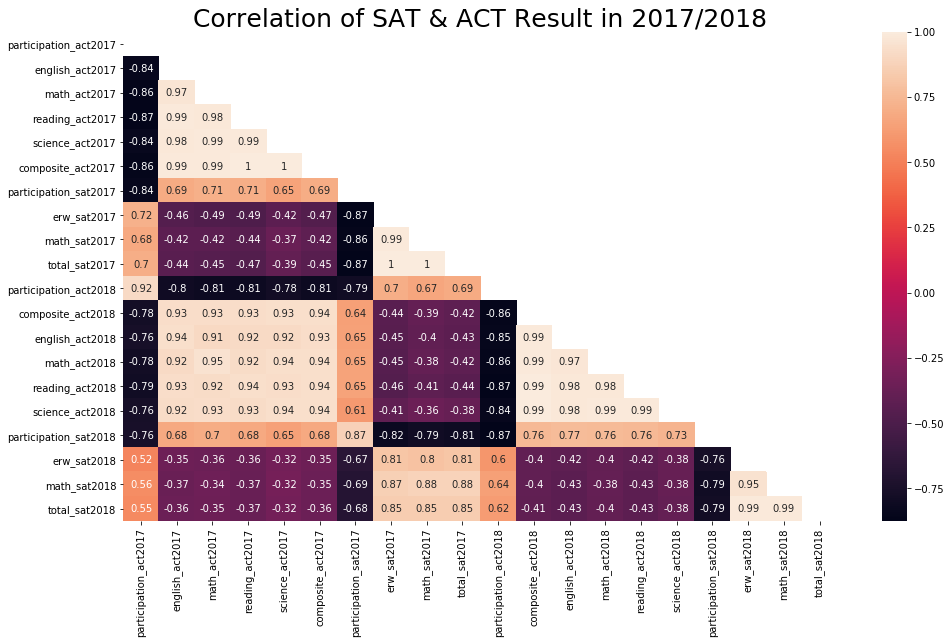

In [103]:
# Establish size of figure.
plt.figure(figsize=(16,9))

# Set tittle
ax = plt.axes()
ax.set_title('Correlation of SAT & ACT Result in 2017/2018', fontdict={'fontsize':25})


# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True


sns.heatmap(final.corr(),mask=mask,annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [104]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10),sharey=True) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=10) # feel free to add more settings
        
        ax[i].axvline(dataframe[column].mean(),color='k',label='Mean', linestyle='dashed', linewidth=1.5)    #Set mean line
        ax[i].axvline(dataframe[column].median(),color='b', label='Median',linestyle='dashed', linewidth=1)  #Set median line
        ax[i].legend(['Mean','Median'])
        
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

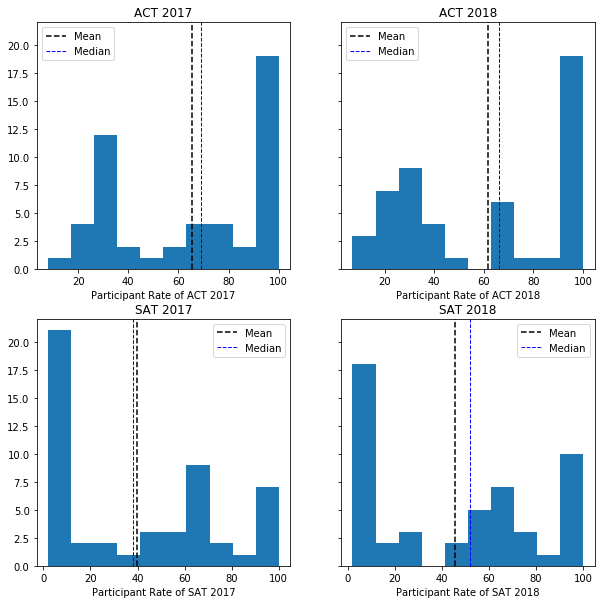

In [105]:
# Participation rates for SAT & ACT

participation = ['participation_act2017','participation_act2018','participation_sat2017','participation_sat2018']
title = ['ACT 2017','ACT 2018','SAT 2017','SAT 2018']
xlabel = ['Participant Rate of ACT 2017','Participant Rate of ACT 2018',
          'Participant Rate of SAT 2017','Participant Rate of SAT 2018']

subplot_histograms(final, participation, title, xlabel)

Participation rates for SAT & ACT

- Distribution of participation rates for ACT test shifted to the left in year 2018 from bimodal distribution in year 2017. Even though the highest peak for both years remain at 90% to 100%, higher frequency of states having low participation rate observed as lower mean and median observed for year 2018.

- Distribution of participation rates for SAT test shifted to the right in year 2018 as higher mean and median observed. Even though the peak for both years remain at 0% to 10%, higher frequency of state having higher participation rate observed. 

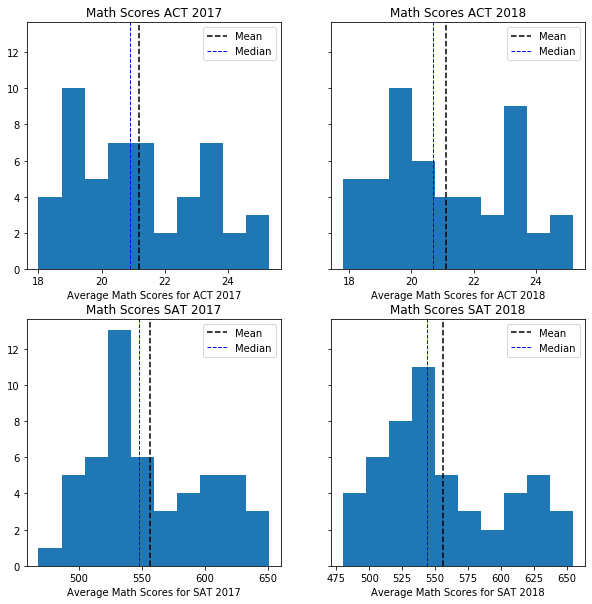

In [106]:
# Math scores for SAT & ACT

math = ['math_act2017','math_act2018','math_sat2017','math_sat2018']
math_title = ['Math Scores ACT 2017','Math Scores ACT 2018','Math Scores SAT 2017','Math Scores SAT 2018']
math_xlabels = ['Average Math Scores for ACT 2017','Average Math Scores for ACT 2018',
               'Average Math Scores for SAT 2017','Average Math Scores for SAT 2018']

subplot_histograms(final, math, math_title, math_xlabels)

Math scores for SAT & ACT

- Average math score for ACT 2018 having a bimodal distribution while it had a random distribution in year 2017. Even though no obvious shift observed for the mean and median, second peak at the higher side observed in year 2018.

- Average math score for SAT test in both years are randomly distributed. Peak of the distribution remains at the same range but slight shift to the left observed on the ditribution as the median shiftted to the left in year 2018.

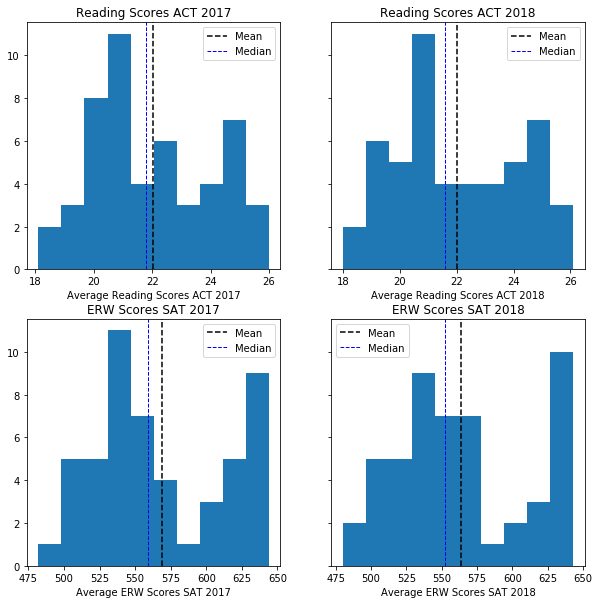

In [107]:
# Reading/verbal scores for SAT & ACT

reading = ['reading_act2017','reading_act2018','erw_sat2017','erw_sat2018']
reading_title = ['Reading Scores ACT 2017','Reading Scores ACT 2018','ERW Scores SAT 2017','ERW Scores SAT 2018']
reading_xlabels = ['Average Reading Scores ACT 2017','Average Reading Scores ACT 2018',
                   'Average ERW Scores SAT 2017','Average ERW Scores SAT 2018']

subplot_histograms(final, reading, reading_title, reading_xlabels)

Reading/verbal scores for SAT & ACT

- Distribution of average reading score for ACT are bimodal in both years. Mean of the average score are the same for both years but lower median observed as there is a shift to the left for the distribution of average reading score for ACT 2018.

- Bimodal distribution observed in average ERW scores for both years of SAT test. Both peaks observed in the same range but with different frequency. A left shift also observed for mean and median in year 2018. 


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


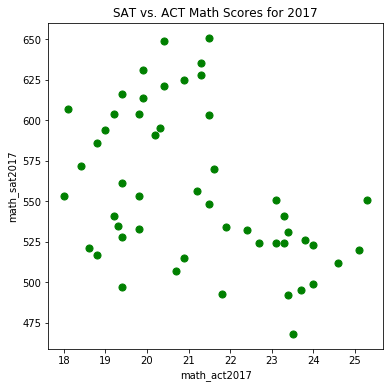

In [108]:
# SAT vs. ACT math scores for 2017
final.plot(x='math_act2017', y='math_sat2017',kind='scatter', figsize=(6,6),s=50,color='green',
           title = 'SAT vs. ACT Math Scores for 2017');

- SAT and ACT math scores for 2017 have a low negative correlation

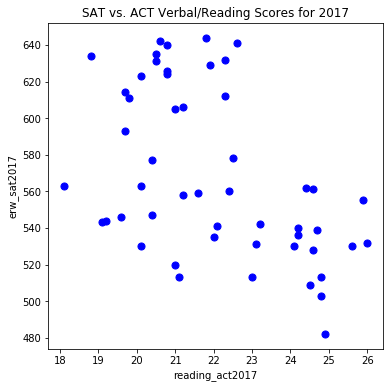

In [109]:
# SAT vs. ACT verbal/reading scores for 2017
final.plot(x='reading_act2017', y='erw_sat2017',kind='scatter', figsize=(6,6),s=50,color='blue',
           title = 'SAT vs. ACT Verbal/Reading Scores for 2017');

- SAT and ACT verbal/reading scores for 2017 have a low negative correlation

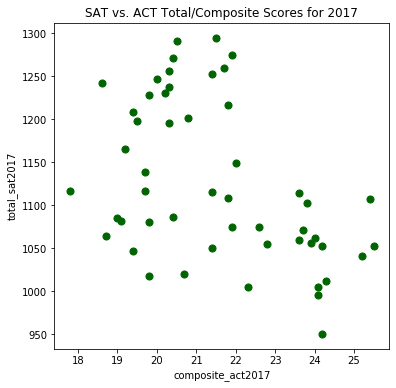

In [110]:
# SAT vs. ACT total/composite scores for 2017
final.plot(x='composite_act2017', y='total_sat2017',kind='scatter', figsize=(6,6),s=50,color='darkgreen',
           title = 'SAT vs. ACT Total/Composite Scores for 2017');

- SAT and ACT total/composite scores for 2017 have a low negative correlation

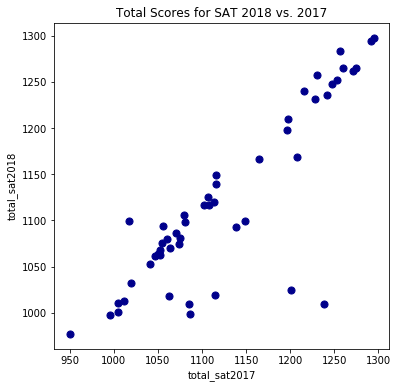

In [111]:
# Total scores for SAT 2017 vs. 2018
final.plot(x='total_sat2017', y='total_sat2018',kind='scatter', figsize=(6,6),s=50,color='darkblue',
           title = 'Total Scores for SAT 2018 vs. 2017');

- Total scores for SAT 2018 and 2017 have a strong positive linear correlation with some outliers.

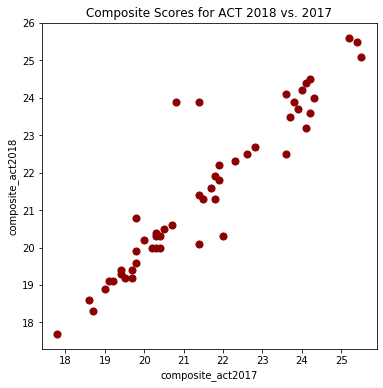

In [112]:
# Composite scores for ACT 2017 vs. 2018
final.plot(x='composite_act2017', y='composite_act2018',kind='scatter', figsize=(6,6),s=50,color='darkred',
           title = 'Composite Scores for ACT 2018 vs. 2017');

- Composite scores for ACT 2018 and 2017 have a strong positive linear correlation with some outliers.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

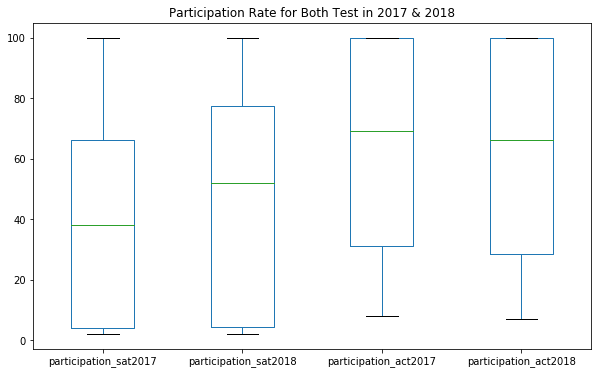

In [113]:
# Participation rate of both test in 2017 & 2018
final.plot(y = ['participation_sat2017','participation_sat2018','participation_act2017','participation_act2018'],
           kind='box',figsize=(10,6),title = 'Participation Rate for Both Test in 2017 & 2018');

Participation rate of both test in 2017 & 2018
- There are no outliers for participation rate in both test.
- As the 75% quartile increase, larger interquartile range (IQR) observed for participation rate of SAT test 2018 as compared to participation rate of SAT test 2017. 


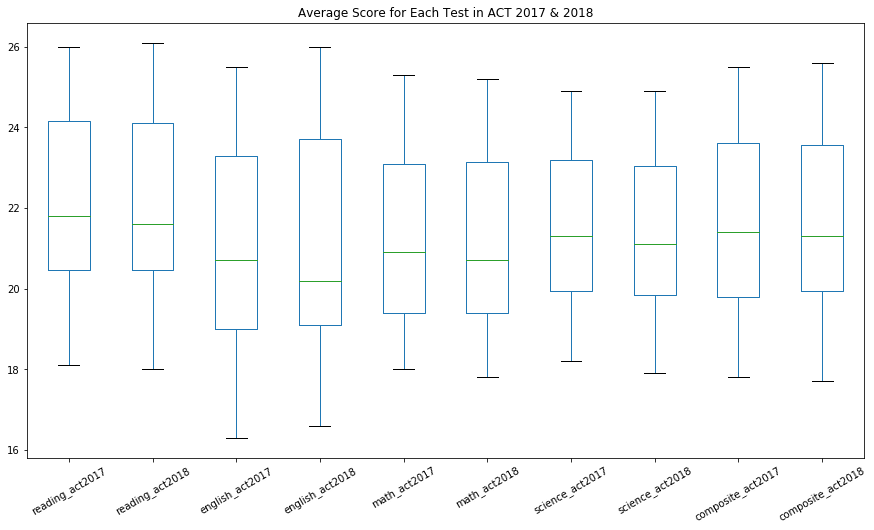

In [114]:
# Average score for each test in ACT 2017 & 2018
final.plot(y = ['reading_act2017','reading_act2018','english_act2017','english_act2018',
                'math_act2017','math_act2018','science_act2017','science_act2018','composite_act2017',
                'composite_act2018'],
           kind='box',rot=30,figsize=(15,8),title = 'Average Score for Each Test in ACT 2017 & 2018');

Average score for each test in ACT 2017 & 2018
- There are no outliers for average score of each test in ACT 2017 and 2018. Overall score range fall between 16 to 26.
- IQR for majority of the average test score in ACT is around 4.
- Average score for english test has larger range as compared with other tests. As 75% quartile increased, IQR for average english test score also increases. 

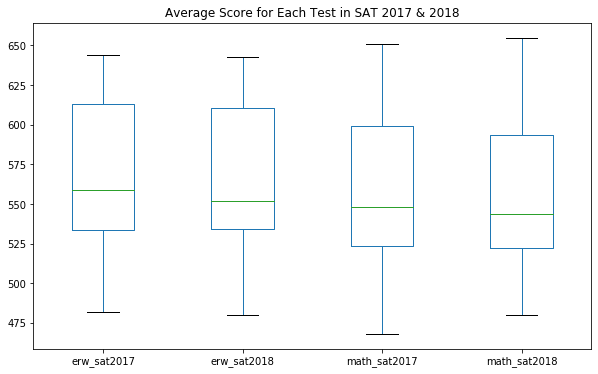

In [115]:
# Average score for each test in SAT 2017 & 2018
final.plot(y = ['erw_sat2017','erw_sat2018','math_sat2017','math_sat2018'],
           kind='box',figsize=(10,6),title = 'Average Score for Each Test in SAT 2017 & 2018');

Average score for each test in SAT 2017 & 2018
- Smaller IQR and lower median observed for both subjects in SAT 2018 as compared to 2017.
- Minimum score for math increase in year 2018.

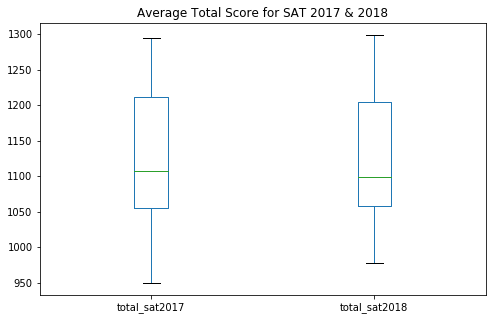

In [116]:
# Average total score for SAT 2017 & 2018
final.plot(y = ['total_sat2017','total_sat2018'],
           kind='box',figsize=(8,5),title = 'Average Total Score for SAT 2017 & 2018');

Average total score for SAT 2017 & 2018
- Minimum average total score increase in year 2018. Total score has smaller IQR and lower median in year 2018 as compared to 2017.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

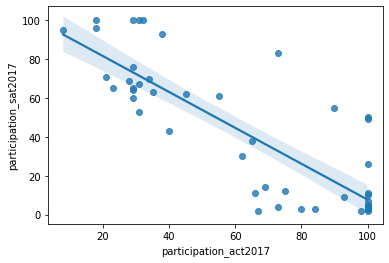

In [117]:
# Correlation between participation rate of ACT2017 and SAT2017
sns.regplot(x='participation_act2017', y='participation_sat2017', data=final);

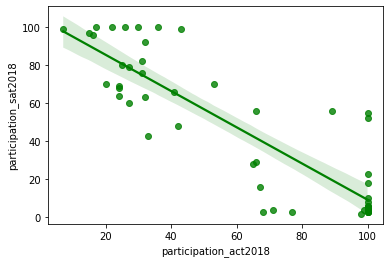

In [118]:
# Correlation between participation rate of ACT2018 and SAT2018
sns.regplot(x='participation_act2018', y='participation_sat2018', data=final,color ='green');

- Based on the scatterplots above, there is a negative correlation between participation rate for SAT and ACT test.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### Participation rates for ACT and SAT

Participation rates for ACT test in both years have their peak at 90% to 100%. As a left shift observed in the distribution of the participation rate for ACT 2018, the mean decreased from 65.25% (in year 2017) to 61.65% (in year 2018) and the median decreased from 69% (in year 2017) to 66% (in year 2018). Minimum participation rates have also dropped 1% in year 2018 as compared to ACT 2017. Overall statewide participation rate for ACT test decrease in year 2018.

However, a right shift has been observed on the distribution of participation rates for SAT 2018. Even though the peak of the distribution remains on the lower side (0% to 10%), the increase of mean (39.80% to 45.75%) and median (38% to 52%) were observed in year 2018. 75% quartile of the participation rate increased from 66% to 77.5% in year 2018. These indicate that there is a shift of the distribution to the right and statewide participation rate for SAT test increase in year 2018.

Based on the scatter plot, a negative linear correlation was observed between participation rate of ACT and participation rate of SAT in both years. When SAT test participation rate increases, ACT test participation rate decreases. 


#### Average math scores for ACT and SAT

A negligible drop observed on mean, median and 75% quartile for average math score in ACT 2018. There is no obvious variation observed in the distribution of average math score for both years. 

As the minimum and the maximum average math score for SAT 2018 increases, a right shift of distribution is also observed. Decrease of 75% quartile while no variation on 25% quartile results in the decrease of the interquartile range. 

Average math score for both test have a low negative correlation. Some states that have low average math score in SAT are having high average math score in ACT, but it is not appropriate to compare the math score for both test as the participation rate are different. 


#### Average reading/verbal scores for ACT and SAT

A negligible drop observed on mean, median and 75% quartile for average reading score in ACT 2018. There is no obvious variation observed in the distribution of average reading score for both years.

Similarly, for average ERW score in SAT, a negligible drop for mean, median and 75% quartile observed in year 2018 and there is no obvious variation observed in the distribution.

Average reading/verbal score for both test have a low negative correlation. Some states that have low average ERW score in SAT are having high average reading score in ACT, but it is also not appropriate to compare the reading/verbal score for both test as the test structure for this subject for both test are different. 



#### Average english scores for ACT

A right shift of distribution observed on average english score in ACT2018 as the minimum and maximum increased. Increase of 75% quartile also increases the interquartile range for average english score in ACT 2018. There is more state with higher english score observed. 


#### ACT composite scores & SAT total scores

A strong positive linear correlation observed between composite score of ACT 2018 and composite score of ACT 2017. Majority of the states are having similar composite scores in ACT test for both years but there are two outlier states that had low composite scores in ACT 2017 are having high composite scores in ACT 2018. Composite scores in ACT 2018 has a smaller interquartile range (IQR) due to the increase of 25% quartile and decrease of 75% quartile.

A strong positive linear correlation also observed between total score in SAT 2018 and total score in SAT 2017. Even though there are some outlier states that had high total score in SAT 2017 and have low total score in SAT 2018, majority of the states are still having similar total score for SAT in both years. Smaller distribution observed on total score for SAT 2018 as the minimum score increased from 950 to 977.

Based on the scatter plot for SAT total scores vs. ACT composite scores in year 2017, a low negative correlation has been observed. States that are having high composite scores in ACT has a relatively low total score in SAT and vice versa.




#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: No

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

The central limit theorem (CLT) states that the distribution of sample means will be a normal distribution as the sample size gets larger and sample sizes equal to or greater than 30 are considered sufficient for the CLT to hold. 

For math and reading, sample will be the average score for each state and the sample size is the participation rate of each state. Sample mean will be calculated from total scores divide by total number of participants. Since the participation rate from each state is different, sample size will also be different and this will affect the calculation of sample mean. In order for the CLT to hold, sample size should be the same for all samples so that sample mean can be calculated correctly. Therefore, the CLT assumption does not hold for math and reading.

For participation rates, sample will be participation rates of each state and sample size will be number of population in each state. Since the sample size also varies for each state, sample mean will also be affected and thus affect the CLT assumption. 



#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 

Participation rates of each state is calculated based on number of population of that state. Considering the number of population in each state are different, it does not make sense to conduct statistical inference with the data given. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

Participation rates for both tests are different and the average math score is calculated based on total score and number of participants of math test. It is not appropriate to compare both SAT and ACT math score as the average math score given is not calculated from the same number of participants. 


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [119]:
mean1 = final['participation_act2017'].mean()
stdev1 = final['participation_act2017'].std()
mean2 = final['participation_sat2017'].mean()
stdev2 = final['participation_sat2017'].std()
n= final['state'].count()

stats.ttest_ind_from_stats(mean1,stdev1,n,mean2,stdev2,n,equal_var = False)

Ttest_indResult(statistic=3.808577890817054, pvalue=0.00024238408285306957)

Null hypothesis,Ho: average participation rates of ACT 2017 = average participation rates of SAT 2017

Alternative hypothesis,Ha : average participation rates of ACT 2017 != average participation rates of SAT 2017

Since the p-value is less than 0.05, it is significant and can reject the null hypothesis.

In [120]:
mean1 = final['participation_act2018'].mean()
stdev1 = final['participation_act2018'].std()
mean2 = final['participation_sat2018'].mean()
stdev2 = final['participation_sat2018'].std()
n= final['state'].count()

stats.ttest_ind_from_stats(mean1,stdev1,n,mean2,stdev2,n,equal_var=False)

Ttest_indResult(statistic=2.247173766735162, pvalue=0.02684447059561333)

Null hypothesis,Ho: average participation rates of ACT 2018 = average participation rates of SAT 2018

Alternative hypothesis,Ha : average participation rates of ACT 2018 != average participation rates of SAT 2018

Since the p-value is less than 0.05, it is significant and can reject the null hypothesis. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado and Illinois has a drastic decrease in participation rate (from 100% to 30% and from 93% to 43%) for ACT and the drastic increase of participation rate (from 11% to 100% and from 9% to 99%) for SAT observed in the same years. This is due to Colorado making SAT test mandatory start from year 2018 and in the same year, ACT has lost the contract for being the test provider in Illinois. 

Rhode Island also sees a 26% increase in participation rate for SAT 2018. This is also due to the effect of mandate change for all Rhode Island 11th graders to take the SAT test.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

A pattern of states with higher SAT total scores and lower participation rates has been observed in both years. This is likely due to statewide requirement for mandatory ACT test. Students will less likely take both tests even if there is an option for them unless they are confident that they will score well. 

Only considering the states that doesn't require mandatory ACT test, Minnesota has a higher total SAT score even though the participation rate is less than 5%, which one can assume that students in Minnesota has the potential to do well in SAT test.

Considering Minnesota is in quite some debt, SAT test is a cheaper alternative for the state to implement as a graduation exam. College Board could focus their efforts to Minnesota in order to be the only test provider in this state. Thus, improving the participation rate for SAT test.